In [1]:
import tensorflow as tf
import numpy as np
import os,glob,cv2
import sys,argparse
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

tamanoDeImagenes=128
num_channels=3
imagenes = []
rutaDeDatosDeEntrenamiento=os.path.join('imagenes/test/*.jpg')
listaDeArchivos = glob.glob(rutaDeDatosDeEntrenamiento)

for archivo in listaDeArchivos[0:10]:
    print("File name "+str(archivo))
    imagen = cv2.imread(archivo)
    
    if imagen is not None:
        imagen = cv2.cvtColor(imagen, cv2.COLOR_RGB2BGR)
        imagen = cv2.resize(imagen, (tamanoDeImagenes, tamanoDeImagenes),0,0, cv2.INTER_LINEAR)
        imagen = imagen.astype(np.float64)
        imagen = np.multiply(imagen, 1.0 / 255.0)
        imagenes.append(imagen)

imagen = cv2.imread('imagenes/test/14.jpg')
imagen = cv2.cvtColor(imagen, cv2.COLOR_RGB2BGR)
imagen = cv2.resize(imagen, (tamanoDeImagenes, tamanoDeImagenes),0,0, cv2.INTER_LINEAR)
imagen = imagen.astype(np.float64)
imagen = np.multiply(imagen, 1.0 / 255.0)
imagenes.append(imagen)
imagenes = np.array(imagenes)
        #The input to the network is of shape [None image_size image_size num_channels]. Hence we reshape.
        #x_batch = imagenes.reshape(1, image_size,image_size,num_channels)
        #plt.imshow(images[0])
        #plt.show()

File name imagenes/test/4352.jpg
File name imagenes/test/2520.jpg
File name imagenes/test/6090.jpg
File name imagenes/test/2526.jpg
File name imagenes/test/3986.jpg
File name imagenes/test/2713.jpg
File name imagenes/test/4049.jpg
File name imagenes/test/3731.jpg
File name imagenes/test/6210.jpg
File name imagenes/test/7863.jpg


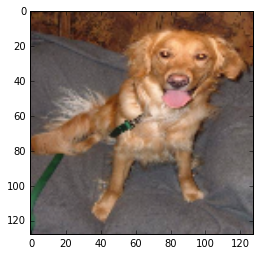

Es un perro [[0.85394156 0.1460584 ]]


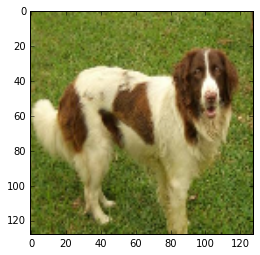

Es un perro [[0.99736196 0.0026381 ]]


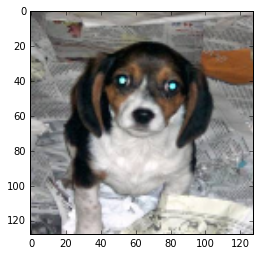

Es un perro [[0.9753597  0.02464041]]


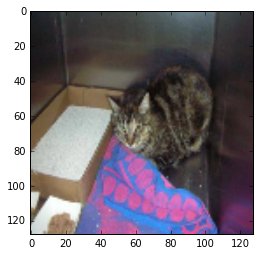

Es un gato [[0.10788093 0.89211905]]


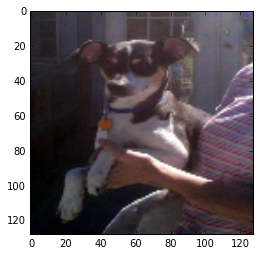

Es un perro [[0.55933195 0.4406681 ]]


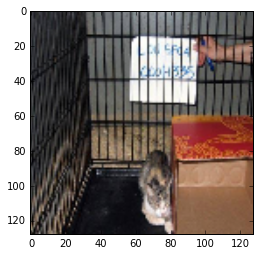

Es un gato [[0.22501096 0.774989  ]]


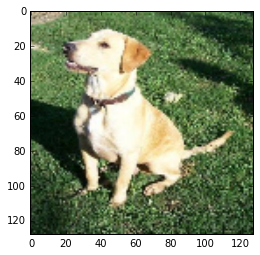

Es un perro [[0.9614237  0.03857636]]


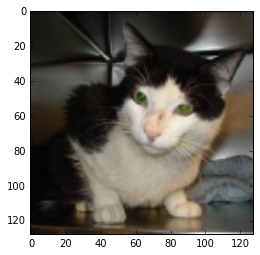

Es un gato [[0.06160995 0.93839   ]]


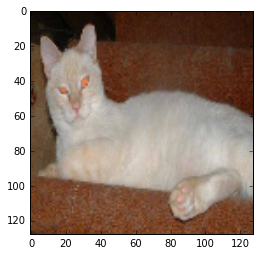

Es un gato [[0.01443387 0.98556614]]


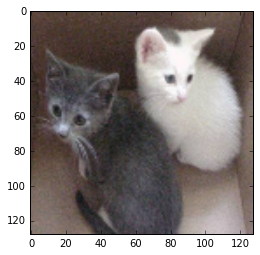

Es un perro [[0.51163185 0.48836812]]


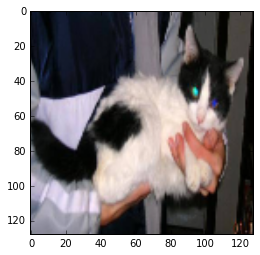

Es un gato [[0.03646852 0.96353143]]


In [2]:
## Let us restore the saved model 
sess = tf.Session()
# Step-1: Recreate the network graph. At this step only graph is created.
saver = tf.train.import_meta_graph('./model/codigoModificado/dogs-cats-model_20_04_2018_v.1.meta.meta')
# Step-2: Now let's load the weights saved using the restore method.
saver.restore(sess, tf.train.latest_checkpoint('./model/codigoModificado'))

# Accessing the default graph which we have restored
graph = tf.get_default_graph()

# Now, let's get hold of the op that we can be processed to get the output.
# In the original network y_pred is the tensor that is the prediction of the network
prediccionDeProbabilidadPorClase = graph.get_tensor_by_name("prediccionDeProbabilidadPorClase:0")

## Let's feed the images to the input placeholders
tensorDeEntrada = graph.get_tensor_by_name("tensorDeEntrada:0") 
tensorDeClases = graph.get_tensor_by_name("tensorDeClases:0") 
numeroDeClases = np.zeros((1, 2)) 

for archivo in imagenes:
    imagenDeEntrada = archivo.reshape(1, tamanoDeImagenes,tamanoDeImagenes,num_channels)
    
    ### Creating the feed_dict that is required to be fed to calculate y_pred 
    alimentarImagenConClases = {tensorDeEntrada: imagenDeEntrada, tensorDeClases: numeroDeClases}
    result=sess.run(prediccionDeProbabilidadPorClase, feed_dict=alimentarImagenConClases)
    # result is of this format [probabiliy_of_rose probability_of_sunflower]
    resultados = result[0]
    plt.imshow(archivo)
    plt.show()
        
    if(resultados[0]>resultados[1]):
        print("Es un perro "+str(result))
    else:
        print("Es un gato "+str(result))
